In [2]:
import os

# Change the working directory
os.chdir('d:\\10Academy\\Week0')

# Verify the current working directory
print(os.getcwd())


d:\10Academy\Week0


In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import sys



In [4]:
from scripts.summaryStat import statsticsSummary,timeSerieAnalysis,cleaningEffect
from scripts.handlingAnomiles import hadlingAnomali, detectingOutLayer, IQRmethodOutliter, zScoreBaseOutliers

In [5]:
print("The directory", os.getcwd())

The directory d:\10Academy\Week0


Reading data and accessing the head sample

In [6]:
dataPath="data/benin-malanville.csv"
df = pd.read_csv(dataPath)
df.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [8]:
df.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [9]:
# Dropping comments column since most of it's contnent is null which is almost all
df=df.drop("Comments", axis=1)

In [10]:
df.tail()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
525595      0.5  119.3      4.1  996         0            0.0   23.5   22.9  
525596      0.4  115.2      2.3  996         0            0.0   23.5   22.9  
525597      0.5  129.8      3.4  996         0            0.0   23.5   22.9  
525598      0.5  124.4      4.3  996         0            0.0   23.5   22.9  
525599      0.3  124.1      5.9  996         0            0.0   23.5   22.9

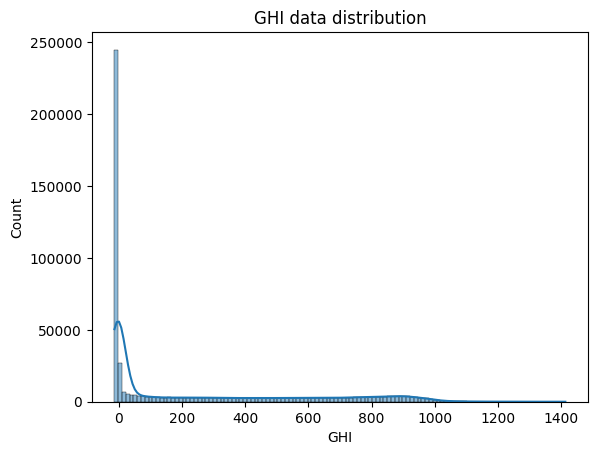

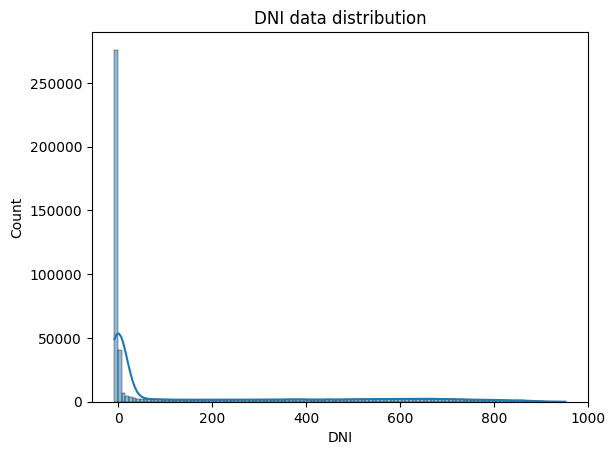

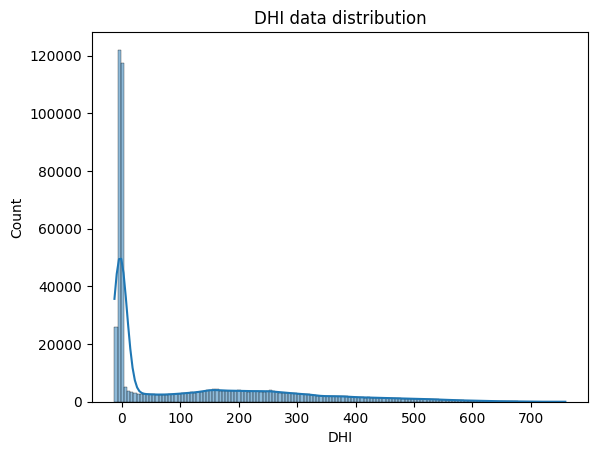

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.200000      28.800000       1.000000   
50%         4.300000      28.000000      55.100000       1.900000   
75%       447.900000      32.300000      80.100000       3.100000   
max      1342.300000      43.800000     100.000000      19.500000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        2.809195       0.473390     153.435172       8.582407   
std         2.029120       0.273395     102.332842       6.385864   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.400000      59.000000       3.700000   
50%         2.600000       0.500000     181.000000       8.600000   
75%         4.100000       0.600000     235.100000      12.300000   
max        26.600000       4.200000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      994.197199       0.000923       0.001905      35.246026   
std         2.474993       0.030363       0.037115      14.807258   
min       985.000000       0.000000       0.000000       9.000000   
25%       993.000000       0.000000       0.000000      24.200000   
50%       994.000000       0.000000       0.000000      30.000000   
75%       996.000000       0.000000       0.000000      46.900000   
max      1003.000000       1.000000       2.500000      81.000000   

               TModB  
count  525600.000000  
mean       32.471736  
std        12.348743  
min         8.100000  
25%        23.600000  
50%        28.900000  
75%        41.500000  
max        72.500000

In [11]:
statsticsSummary(df, ["GHI","DNI","DHI"])

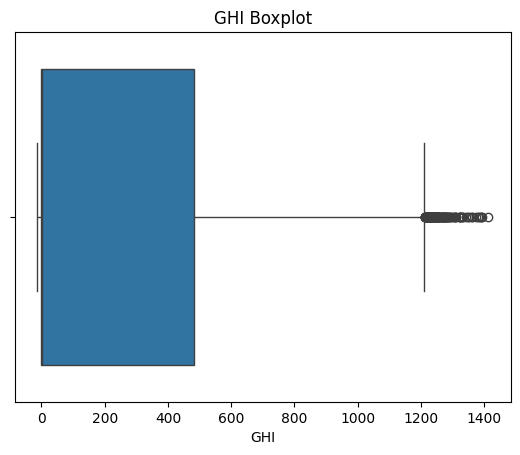

In [12]:
detectingOutLayer(df, "GHI")

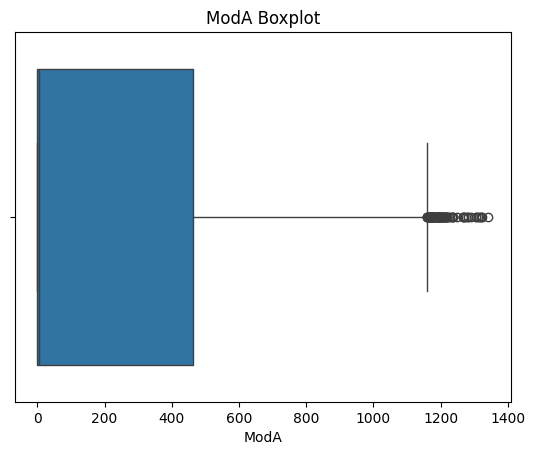

In [13]:
detectingOutLayer(df, "ModA")

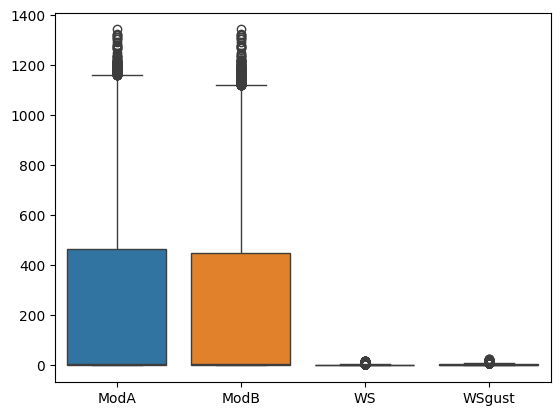

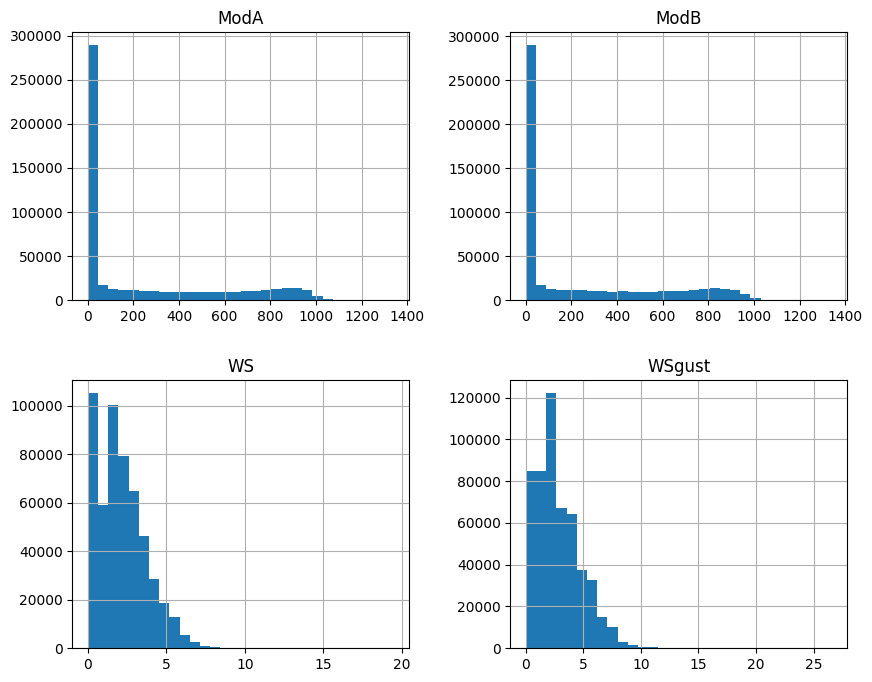

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb  RH  WS  WSgust  WSstdev  \
0            NaN  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
1            NaN  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
2            NaN  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
3            NaN  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
4            NaN  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
...          ...  ...  ...  ...   ...   ...   ...  ..  ..     ...      ...   
525595       NaN  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
525596       NaN  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
525597       NaN  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
525598       NaN  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
525599       NaN  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   

        WD  WDstdev  BP  Cleaning  Precipitation  TModA  TModB  
0      NaN      NaN NaN       NaN            NaN    NaN    NaN  
1      NaN      NaN NaN       NaN            NaN    NaN    NaN  
2      NaN      NaN NaN       NaN            NaN    NaN    NaN  
3      NaN      NaN NaN       NaN            NaN    NaN    NaN  
4      NaN      NaN NaN       NaN            NaN    NaN    NaN  
...     ..      ...  ..       ...            ...    ...    ...  
525595 NaN      NaN NaN       NaN            NaN    NaN    NaN  
525596 NaN      NaN NaN       NaN            NaN    NaN    NaN  
525597 NaN      NaN NaN       NaN            NaN    NaN    NaN  
525598 NaN      NaN NaN       NaN            NaN    NaN    NaN  
525599 NaN      NaN NaN       NaN            NaN    NaN    NaN  

[525600 rows x 18 columns]

In [14]:
IQRmethodOutliter(df, ['ModA', 'ModB', 'WS', 'WSgust'])

In [15]:
zscoredData=zScoreBaseOutliers(df, ['ModA', 'ModB', 'WS', 'WSgust'])

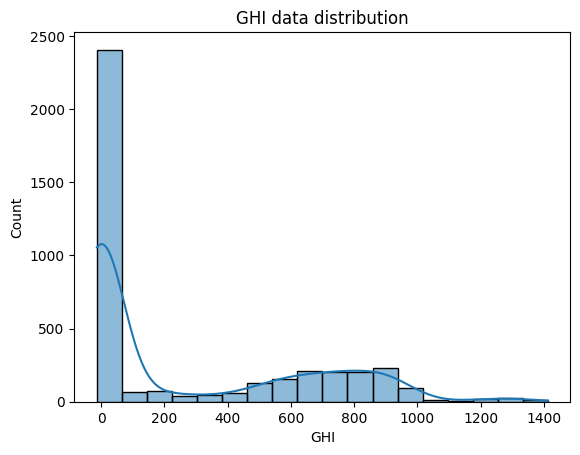

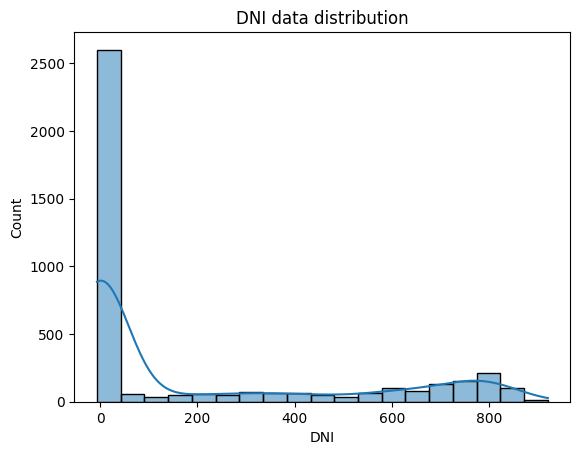

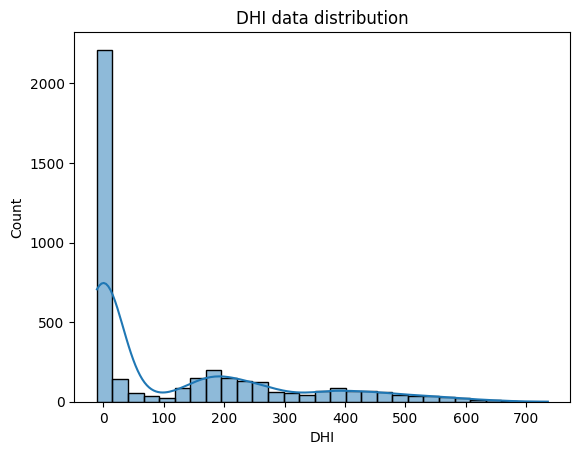

GHI          DNI          DHI         ModA         ModB  \
count  4002.000000  4002.000000  4002.000000  4002.000000  4002.000000   
mean    271.385807   194.917091   117.543828   279.549850   261.904623   
std     371.516801   301.254240   167.383917   379.551121   356.855527   
min     -12.900000    -6.700000   -10.800000     0.000000     0.000000   
25%      -2.100000    -0.200000    -2.000000     0.000000     0.000000   
50%       1.800000     0.200000     2.200000     5.000000     4.900000   
75%     629.775000   394.600000   209.625000   656.800000   607.875000   
max    1413.000000   920.300000   735.700000  1342.300000  1342.300000   

              Tamb           RH           WS       WSgust      WSstdev  \
count  4002.000000  4002.000000  4002.000000  4002.000000  4002.000000   
mean     26.975512    60.407696     7.928736    10.390555     1.352249   
std       4.561836    30.958411     1.875011     2.433919     0.440452   
min      20.100000     3.600000     0.200000     1.100000     0.300000   
25%      23.200000    25.600000     7.000000     8.900000     1.100000   
50%      25.700000    69.250000     7.500000     9.700000     1.300000   
75%      30.300000    89.100000     8.500000    11.200000     1.600000   
max      42.800000   100.000000    19.500000    26.600000     4.200000   

                WD      WDstdev           BP     Cleaning  Precipitation  \
count  4002.000000  4002.000000  4002.000000  4002.000000    4002.000000   
mean    131.832134    11.524813   995.887056     0.000250       0.104823   
std      67.142921     3.283651     2.861065     0.015807       0.321828   
min       0.400000     4.400000   986.000000     0.000000       0.000000   
25%      83.600000     9.600000   994.000000     0.000000       0.000000   
50%     110.500000    11.100000   996.000000     0.000000       0.000000   
75%     168.750000    12.800000   998.000000     0.000000       0.000000   
max     357.000000    70.400000  1003.000000     1.000000       2.500000   

             TModA        TModB  
count  4002.000000  4002.000000  
mean     34.066792    30.504723  
std      11.899368     8.662943  
min      20.900000    20.500000  
25%      24.000000    23.500000  
50%      29.300000    28.200000  
75%      43.700000    35.200000  
max      73.500000    62.700000

In [16]:
statsticsSummary(zscoredData,["GHI","DNI","DHI"] )

### Key Insights on Solar Radiation Distribution

- **Right-Skewed Distribution**: The histogram shows a strong right skew, indicating that most data points have low or zero values for GHI, DNI, and DHI, with fewer instances of high values.

- **High Frequency at Zero**: The peak at 0 suggests a significant portion of measurements were taken during nighttime or under cloudy conditions with minimal sunlight.

- **Rare High Solar Radiation**: Periods of intense sunlight, where GHI, DNI, and DHI are high, are much less frequent, indicating that optimal solar conditions are limited.

### **Conclusion**

This distribution highlights the predominance of low solar radiation periods, emphasizing the need for efficient energy storage and optimization strategies during high-radiation periods.


### Handling Negative Solar Radiation Readings

Negative solar radiation readings, as indicated in the graph, are physically impossible and point to data errors. These could stem from sensor malfunctions, data entry mistakes, or incorrect unit conversions.

#### **Action Steps:**
1. **Investigate:** Ensure sensors are functioning properly and review data processing pipelines for errors.
2. **Clean the Data:** Remove or correct negative values, replacing them with realistic estimates like zero.
3. **Quality Check:** Conduct a thorough data quality assessment to catch any additional anomalies.

### **Conclusion:**
Correcting negative readings is crucial for ensuring accurate solar radiation analysis and reliable insights.



In [17]:
handledData=hadlingAnomali(df,["GHI","DNI","DHI"])
handledData

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
392     2021-08-09 06:33  0.2 -0.3  0.3   1.5   1.5  24.2  97.9  0.1     0.7   
393     2021-08-09 06:34  0.5 -0.3  0.5   1.8   1.8  24.2  98.0  0.0     0.4   
394     2021-08-09 06:35  0.8 -0.3  0.9   2.1   2.1  24.2  98.0  0.0     0.0   
395     2021-08-09 06:36  1.2 -0.3  1.2   2.4   2.4  24.2  98.0  0.0     0.0   
396     2021-08-09 06:37  1.6 -0.2  1.6   2.7   2.7  24.2  98.1  0.0     0.0   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525292  2022-08-08 18:53  1.8 -0.1  0.9   5.4   5.4  22.7  98.1  1.4     1.9   
525293  2022-08-08 18:54  1.5 -0.1  0.5   5.1   5.0  22.7  98.2  1.8     2.1   
525294  2022-08-08 18:55  1.0 -0.2  0.1   4.8   4.7  22.7  98.0  1.6     2.1   
525295  2022-08-08 18:56  0.7 -0.2 -0.3   4.5   4.4  22.7  97.9  1.3     1.9   
525296  2022-08-08 18:57  0.5 -0.1 -0.5   4.2   4.1  22.8  98.0  1.2     2.6   

        WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
392         0.3  195.2      0.0  997         0            0.0   24.0   23.6  
393         0.1  193.1      0.0  997         0            0.0   24.0   23.6  
394         0.0    0.0      0.0  997         0            0.0   24.0   23.6  
395         0.0    0.0      0.0  997         0            0.0   24.0   23.6  
396         0.0    0.0      0.0  997         0            0.0   23.9   23.6  
...         ...    ...      ...  ...       ...            ...    ...    ...  
525292      0.5  267.4      8.8  993         0            0.0   23.3   22.5  
525293      0.4  265.3      7.1  993         0            0.0   23.3   22.5  
525294      0.4  261.0      5.6  993         0            0.0   23.3   22.6  
525295      0.5  265.1      5.7  993         0            0.0   23.3   22.5  
525296      0.7  269.3      9.6  993         0            0.0   23.3   22.5  

[267411 rows x 18 columns]

In [18]:
Nonenegativedatazscore=hadlingAnomali(zscoredData,["GHI","DNI","DHI"])

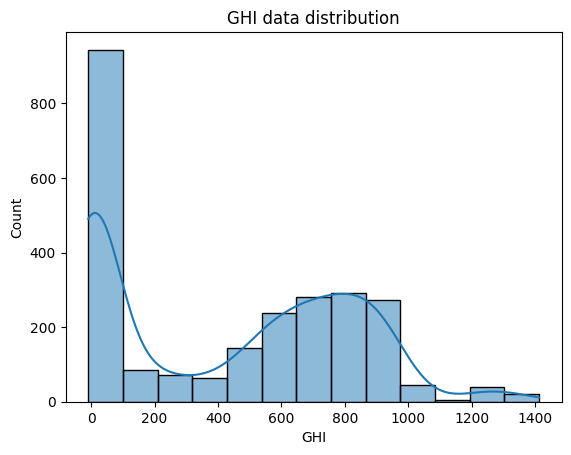

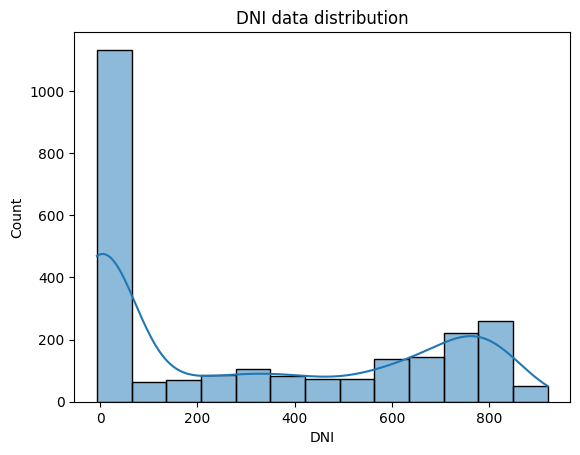

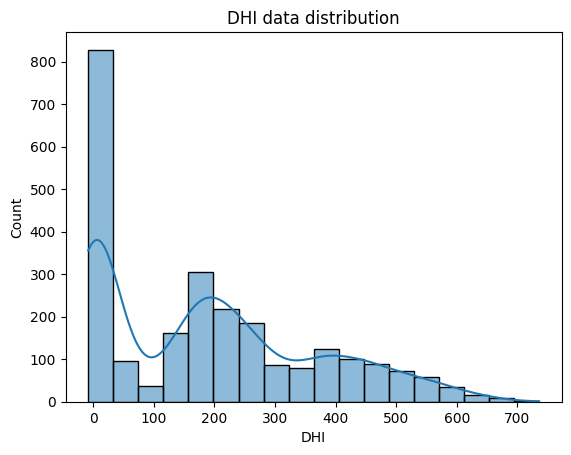

GHI          DNI          DHI         ModA         ModB  \
count  2501.000000  2501.000000  2501.000000  2501.000000  2501.000000   
mean    435.830188   312.097521   189.565854   447.255218   419.021112   
std     385.699813   329.571763   176.073650   394.378098   371.430272   
min      -9.400000    -6.700000    -8.300000     0.000000     0.000000   
25%       8.200000     0.300000     8.300000    10.100000    10.000000   
50%     508.900000   196.500000   180.300000   508.200000   468.600000   
75%     771.700000   674.000000   300.700000   815.000000   762.300000   
max    1413.000000   920.300000   735.700000  1342.300000  1342.300000   

              Tamb           RH           WS       WSgust      WSstdev  \
count  2501.000000  2501.000000  2501.000000  2501.000000  2501.000000   
mean     27.551659    50.394002     7.739704    10.106158     1.311635   
std       4.957224    33.214502     1.940658     2.507576     0.443771   
min      20.100000     3.600000     0.200000     1.100000     0.300000   
25%      23.500000    16.800000     7.000000     8.900000     1.000000   
50%      26.200000    48.900000     7.300000     9.400000     1.200000   
75%      31.100000    85.400000     8.100000    10.400000     1.500000   
max      42.800000    99.800000    18.200000    23.900000     4.000000   

                WD      WDstdev           BP     Cleaning  Precipitation  \
count  2501.000000  2501.000000  2501.000000  2501.000000    2501.000000   
mean    127.019232    11.545982   996.121551     0.000400       0.120552   
std      70.911845     3.649469     2.987912     0.019996       0.357806   
min       0.700000     4.400000   986.000000     0.000000       0.000000   
25%      80.300000     9.500000   994.000000     0.000000       0.000000   
50%      96.900000    11.000000   997.000000     0.000000       0.000000   
75%     161.800000    12.800000   998.000000     0.000000       0.000000   
max     357.000000    70.400000  1003.000000     1.000000       2.500000   

             TModA        TModB  
count  2501.000000  2501.000000  
mean     38.620152    33.257377  
std      12.777408     9.586988  
min      21.000000    20.500000  
25%      25.100000    24.400000  
50%      39.200000    31.700000  
75%      48.300000    39.400000  
max      73.500000    62.700000

In [17]:
statsticsSummary(Nonenegativedatazscore,["GHI","DNI","DHI"] )

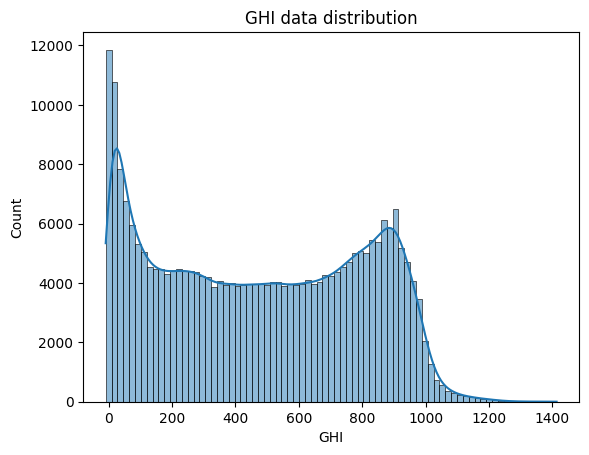

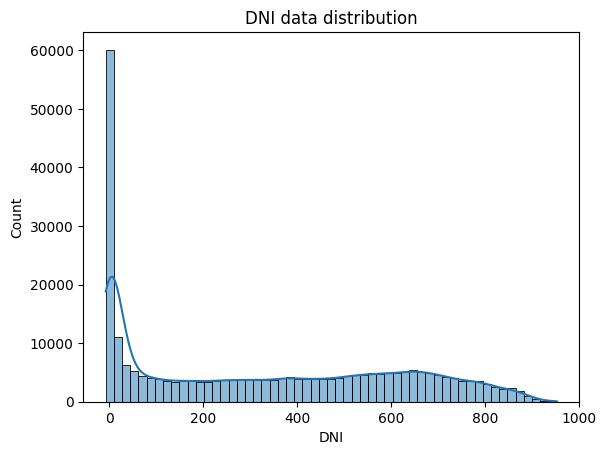

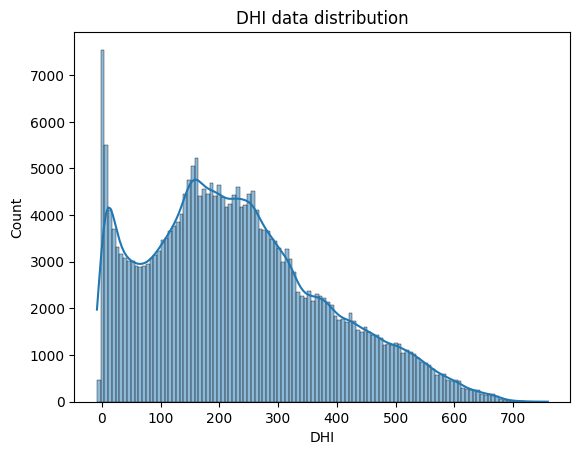

GHI            DNI            DHI           ModA  \
count  267411.000000  267411.000000  267411.000000  267411.000000   
mean      475.565936     329.079888     229.942745     464.960819   
std       321.065001     285.075938     150.876017     322.281519   
min        -9.400000      -7.800000      -8.300000       0.000000   
25%       174.800000      18.800000     116.600000     157.600000   
50%       472.600000     303.500000     212.700000     452.600000   
75%       771.300000     586.900000     323.700000     765.500000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  267411.000000  267411.000000  267411.000000  267411.000000   
mean      449.818238      30.973887      47.049438       2.749410   
std       312.357966       5.585439      27.610013       1.582656   
min         0.000000      11.000000       2.100000       0.000000   
25%       153.050000      27.200000      19.800000       1.600000   
50%       437.400000      31.200000      46.400000       2.600000   
75%       737.700000      35.200000      70.000000       3.800000   
max      1342.300000      43.800000     100.000000      18.200000   

              WSgust        WSstdev             WD        WDstdev  \
count  267411.000000  267411.000000  267411.000000  267411.000000   
mean        3.650599       0.578257     160.223554      11.571350   
std         1.963263       0.257588      96.186734       6.284375   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.400000       0.400000      75.800000       8.200000   
50%         3.400000       0.500000     163.600000      11.200000   
75%         4.900000       0.700000     240.800000      14.500000   
max        23.900000       4.000000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  267411.000000  267411.000000  267411.000000  267411.000000   
mean      994.086354       0.001814       0.001954      45.884622   
std         2.643183       0.042549       0.041389      13.221400   
min       985.000000       0.000000       0.000000       9.200000   
25%       992.000000       0.000000       0.000000      36.300000   
50%       994.000000       0.000000       0.000000      46.600000   
75%       996.000000       0.000000       0.000000      55.700000   
max      1003.000000       1.000000       2.500000      81.000000   

               TModB  
count  267411.000000  
mean       41.059808  
std        11.101381  
min         8.200000  
25%        33.100000  
50%        41.300000  
75%        48.900000  
max        72.500000

In [19]:
statsticsSummary(handledData,["GHI","DNI","DHI"] )

### Key Insights on Solar Radiation Distribution After Dropping Negative Readings

- **Right-Skewed Distribution**: Despite the right skew, the data shows a normal distribution pattern typical for solar radiation readings. This distribution indicates a concentration of values around a different point, reflecting consistent solar radiation output and efficiency. This insight helps in determining optimal conditions for solar energy utilization and making informed decisions about when to maintain certain operational parameters.

- **High-Frequency Readings Across Different Areas**: The peaks observed in various regions of the data suggest that a significant portion of measurements were taken under different environmental conditions or during various time periods with varying sunlight exposure. This variation helps identify the most effective times and conditions for maximizing solar energy efficiency, guiding decisions on when to optimize operations for the best solar output.


<!-- - **Rare High Solar Radiation**: Periods of intense sunlight, where GHI, DNI, and DHI are high, are much less frequent, indicating that optimal solar conditions are limited.

### **Conclusion**

This distribution highlights the predominance of low solar radiation periods, emphasizing the need for efficient energy storage and optimization strategies during high-radiation periods. -->


Exploring the time series

In [20]:
# setting the timestamp as an index for easit time-base manipulation
df["Timestamp"]=pd.to_datetime(df["Timestamp"])
df.set_index("Timestamp", inplace=True)
df.head()

GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

                     WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  \
Timestamp                                                                    
2021-08-09 00:01:00      0.1  122.1      0.0  998         0            0.0   
2021-08-09 00:02:00      0.0    0.0      0.0  998         0            0.0   
2021-08-09 00:03:00      0.5  124.6      1.5  997         0            0.0   
2021-08-09 00:04:00      0.4  120.3      1.3  997         0            0.0   
2021-08-09 00:05:00      0.3  113.2      1.0  997         0            0.0   

                     TModA  TModB  
Timestamp                          
2021-08-09 00:01:00   26.3   26.2  
2021-08-09 00:02:00   26.3   26.2  
2021-08-09 00:03:00   26.4   26.2  
2021-08-09 00:04:00   26.4   26.3  
2021-08-09 00:05:00   26.4   26.3

array([[<Axes: title={'center': 'GHI'}>, <Axes: title={'center': 'DNI'}>],
       [<Axes: title={'center': 'DHI'}>, <Axes: >]], dtype=object)

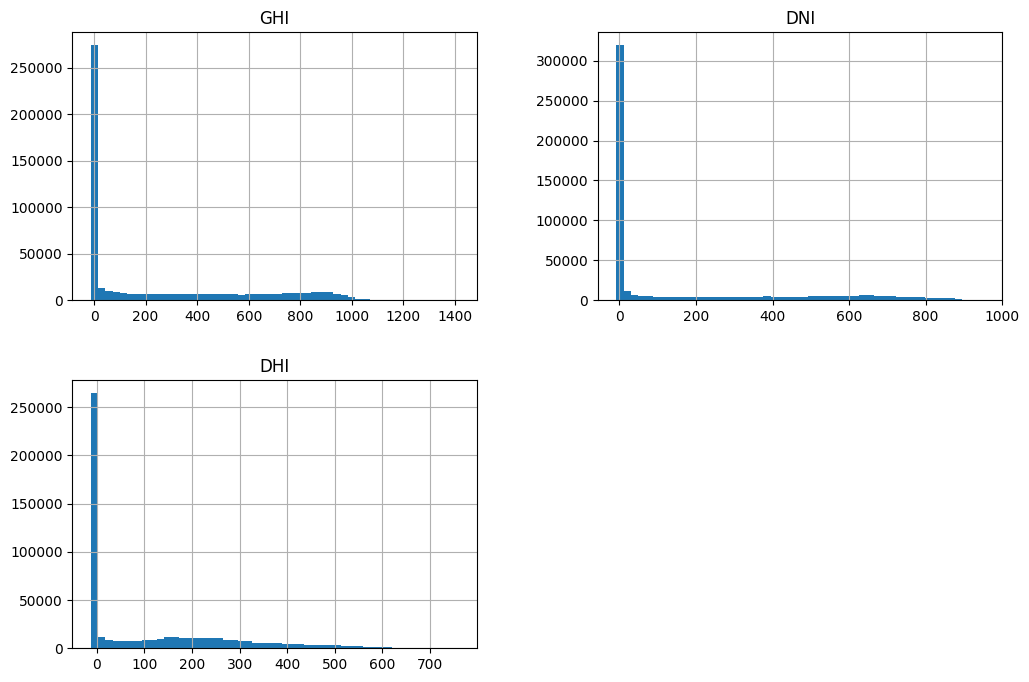

In [21]:
# Checking the distributions of solar radiation variables
df[['GHI', 'DNI', 'DHI']].hist(bins=50, figsize=(12, 8))

In [22]:
df.nunique()

GHI               8609
DNI               8905
DHI               6995
ModA             10755
ModB              8461
Tamb               329
RH                 980
WS                 164
WSgust              92
WSstdev             42
WD                3601
WDstdev            679
BP                  19
Cleaning             2
Precipitation       26
TModA              712
TModB              642
dtype: int64

In [23]:
handledData.nunique()

Timestamp        267411
GHI                8584
DNI                8900
DHI                6948
ModA              10755
ModB               8461
Tamb                329
RH                  980
WS                  156
WSgust               89
WSstdev              40
WD                 3601
WDstdev             675
BP                   19
Cleaning              2
Precipitation        26
TModA               710
TModB               641
dtype: int64

In [24]:
zscoredData.nunique()

Timestamp        4002
GHI              1566
DNI              1340
DHI              1666
ModA             1709
ModB             1466
Tamb              211
RH                856
WS                152
WSgust             80
WSstdev            39
WD               1768
WDstdev           199
BP                 18
Cleaning            2
Precipitation      26
TModA             459
TModB             374
dtype: int64

In [25]:
Nonenegativedatazscore.nunique()

Timestamp        2501
GHI              1556
DNI              1332
DHI              1656
ModA             1705
ModB             1463
Tamb              211
RH                764
WS                144
WSgust             78
WSstdev            37
WD               1276
WDstdev           182
BP                 18
Cleaning            2
Precipitation      26
TModA             455
TModB             374
dtype: int64

In [26]:
dataCorelation=df.corr()

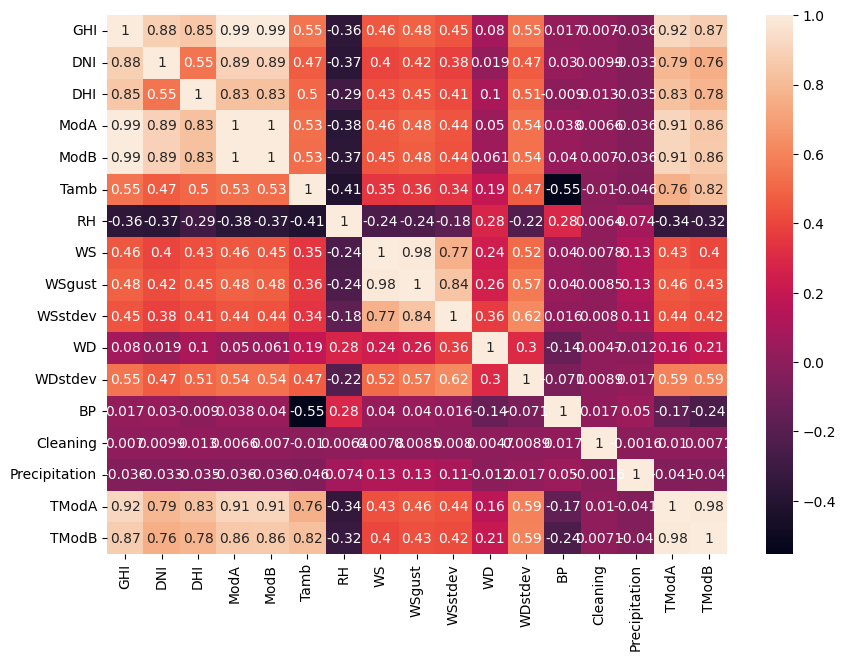

In [27]:
plt.figure(figsize=(10,7))
sb.heatmap(dataCorelation, annot=True)
plt.show()

In [28]:
# setting the timestamp as an index for easit time-base manipulation
handledData["Timestamp"]=pd.to_datetime(handledData["Timestamp"])
handledData.set_index("Timestamp", inplace=True)
handledData.head()

C:\Users\Coop\AppData\Local\Temp\ipykernel_14860\2934951080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  handledData["Timestamp"]=pd.to_datetime(handledData["Timestamp"])


GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-08-09 06:33:00  0.2 -0.3  0.3   1.5   1.5  24.2  97.9  0.1     0.7   
2021-08-09 06:34:00  0.5 -0.3  0.5   1.8   1.8  24.2  98.0  0.0     0.4   
2021-08-09 06:35:00  0.8 -0.3  0.9   2.1   2.1  24.2  98.0  0.0     0.0   
2021-08-09 06:36:00  1.2 -0.3  1.2   2.4   2.4  24.2  98.0  0.0     0.0   
2021-08-09 06:37:00  1.6 -0.2  1.6   2.7   2.7  24.2  98.1  0.0     0.0   

                     WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  \
Timestamp                                                                    
2021-08-09 06:33:00      0.3  195.2      0.0  997         0            0.0   
2021-08-09 06:34:00      0.1  193.1      0.0  997         0            0.0   
2021-08-09 06:35:00      0.0    0.0      0.0  997         0            0.0   
2021-08-09 06:36:00      0.0    0.0      0.0  997         0            0.0   
2021-08-09 06:37:00      0.0    0.0      0.0  997         0            0.0   

                     TModA  TModB  
Timestamp                          
2021-08-09 06:33:00   24.0   23.6  
2021-08-09 06:34:00   24.0   23.6  
2021-08-09 06:35:00   24.0   23.6  
2021-08-09 06:36:00   24.0   23.6  
2021-08-09 06:37:00   23.9   23.6

In [29]:
# setting the timestamp as an index for easit time-base manipulation
Nonenegativedatazscore["Timestamp"]=pd.to_datetime(Nonenegativedatazscore["Timestamp"])
Nonenegativedatazscore.set_index("Timestamp", inplace=True)
Nonenegativedatazscore.head()

C:\Users\Coop\AppData\Local\Temp\ipykernel_14860\829706410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nonenegativedatazscore["Timestamp"]=pd.to_datetime(Nonenegativedatazscore["Timestamp"])


GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  \
Timestamp                                                                    
2021-08-09 11:12:00  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6  3.4   
2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1  4.0   
2021-08-09 11:17:00  1334.0  751.9  620.0  1267.3  1267.3  31.1  67.0  2.7   
2021-08-09 14:11:00  1324.0  813.0  532.3  1218.0  1217.0  31.0  62.9  2.2   
2021-08-12 11:40:00  1324.0  675.6  659.6  1271.0  1271.0  29.1  75.4  3.6   

                     WSgust  WSstdev     WD  WDstdev   BP  Cleaning  \
Timestamp                                                             
2021-08-09 11:12:00     4.1      0.6  175.8     13.3  999         0   
2021-08-09 11:15:00     4.6      0.4  169.1     12.3  999         0   
2021-08-09 11:17:00     3.6      0.6  208.0     15.9  999         0   
2021-08-09 14:11:00     3.1      0.6  225.6     10.7  997         0   
2021-08-12 11:40:00     4.9      0.7  172.2     11.4  997         0   

                     Precipitation  TModA  TModB  
Timestamp                                         
2021-08-09 11:12:00            0.0   63.7   53.1  
2021-08-09 11:15:00            0.0   65.0   53.5  
2021-08-09 11:17:00            0.0   66.0   53.9  
2021-08-09 14:11:00            0.0   58.7   53.6  
2021-08-12 11:40:00            0.0   57.2   46.8

In [30]:
dataCorelationNoneNegative=handledData.corr()
dataCorelationNoneNegativeZscored=Nonenegativedatazscore.corr()

In [31]:
Nonenegativedatazscore

GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  \
Timestamp                                                                    
2021-08-09 11:12:00  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6  3.4   
2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1  4.0   
2021-08-09 11:17:00  1334.0  751.9  620.0  1267.3  1267.3  31.1  67.0  2.7   
2021-08-09 14:11:00  1324.0  813.0  532.3  1218.0  1217.0  31.0  62.9  2.2   
2021-08-12 11:40:00  1324.0  675.6  659.6  1271.0  1271.0  29.1  75.4  3.6   
...                     ...    ...    ...     ...     ...   ...   ...  ...   
2022-08-08 16:22:00     4.6   -0.1    4.6     6.1     5.9  21.9  99.0  7.1   
2022-08-08 16:23:00     4.6    0.2    4.6     5.9     5.8  21.9  99.0  6.5   
2022-08-08 16:24:00     4.5   -0.1    4.5     5.8     5.7  21.9  99.0  6.7   
2022-08-08 16:32:00     4.7   -0.1    4.8     6.0     5.9  22.0  99.1  7.3   
2022-08-08 16:36:00     4.8    0.0    4.9     6.0     5.9  22.0  99.1  6.9   

                     WSgust  WSstdev     WD  WDstdev   BP  Cleaning  \
Timestamp                                                             
2021-08-09 11:12:00     4.1      0.6  175.8     13.3  999         0   
2021-08-09 11:15:00     4.6      0.4  169.1     12.3  999         0   
2021-08-09 11:17:00     3.6      0.6  208.0     15.9  999         0   
2021-08-09 14:11:00     3.1      0.6  225.6     10.7  997         0   
2021-08-12 11:40:00     4.9      0.7  172.2     11.4  997         0   
...                     ...      ...    ...      ...  ...       ...   
2022-08-08 16:22:00     9.7      1.2  127.8     10.7  995         0   
2022-08-08 16:23:00     9.2      1.2  126.3     12.3  995         0   
2022-08-08 16:24:00     8.9      1.1  132.0      8.1  995         0   
2022-08-08 16:32:00     8.7      0.8  146.9      8.8  995         0   
2022-08-08 16:36:00     8.9      1.1  153.8      9.4  995         0   

                     Precipitation  TModA  TModB  
Timestamp                                         
2021-08-09 11:12:00            0.0   63.7   53.1  
2021-08-09 11:15:00            0.0   65.0   53.5  
2021-08-09 11:17:00            0.0   66.0   53.9  
2021-08-09 14:11:00            0.0   58.7   53.6  
2021-08-12 11:40:00            0.0   57.2   46.8  
...                            ...    ...    ...  
2022-08-08 16:22:00            0.2   22.8   22.0  
2022-08-08 16:23:00            0.2   22.8   22.0  
2022-08-08 16:24:00            0.2   22.7   22.0  
2022-08-08 16:32:00            0.1   22.8   22.0  
2022-08-08 16:36:00            0.1   22.8   22.0  

[2501 rows x 17 columns]

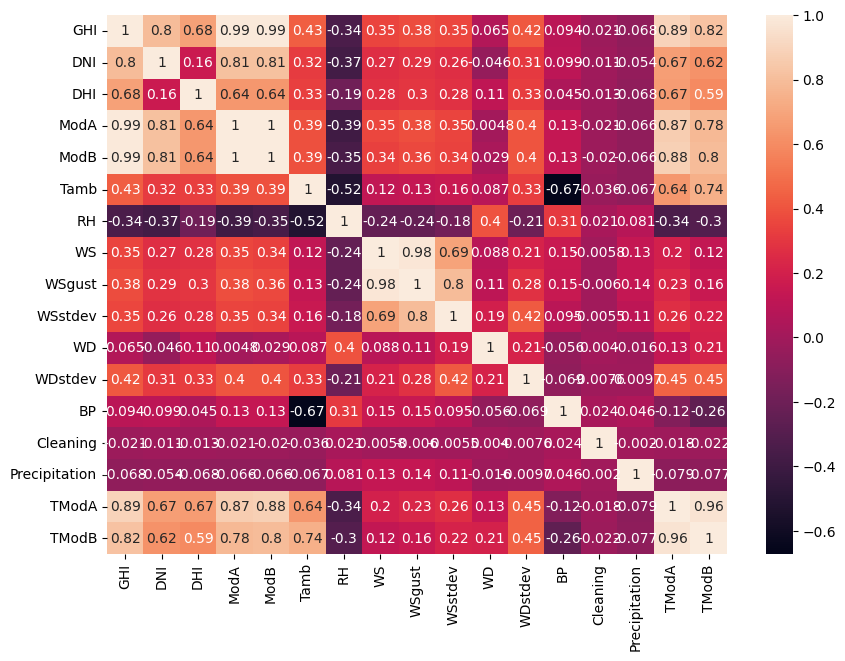

In [32]:
plt.figure(figsize=(10,7))
sb.heatmap(dataCorelationNoneNegative, annot=True)
plt.show()

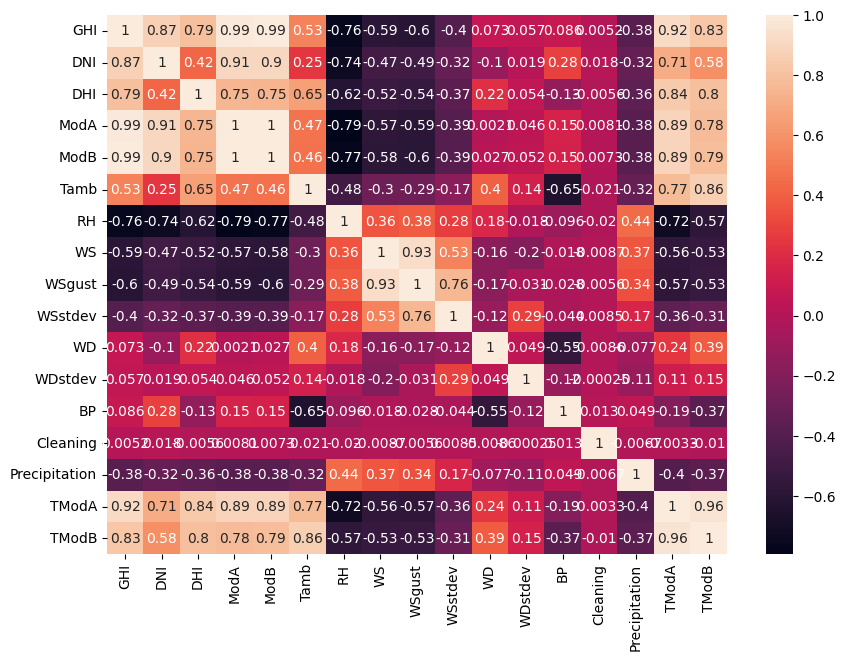

In [33]:
plt.figure(figsize=(10,7))
sb.heatmap(dataCorelationNoneNegativeZscored, annot=True)
plt.show()

In [34]:
# Checking correlation between solar radiation and environmental factors
envSradiationCorelation = df[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'BP']].corr()

# Display the correlation matrix
print(envSradiationCorelation)

           GHI       DNI       DHI      Tamb        RH        WS        BP
GHI   1.000000  0.882376  0.849989  0.547513 -0.360029  0.457349  0.016913
DNI   0.882376  1.000000  0.546602  0.467584 -0.373475  0.397099  0.029967
DHI   0.849989  0.546602  1.000000  0.503925 -0.285018  0.426959 -0.009028
Tamb  0.547513  0.467584  0.503925  1.000000 -0.414842  0.347188 -0.553705
RH   -0.360029 -0.373475 -0.285018 -0.414842  1.000000 -0.244108  0.284643
WS    0.457349  0.397099  0.426959  0.347188 -0.244108  1.000000  0.040233
BP    0.016913  0.029967 -0.009028 -0.553705  0.284643  0.040233  1.000000


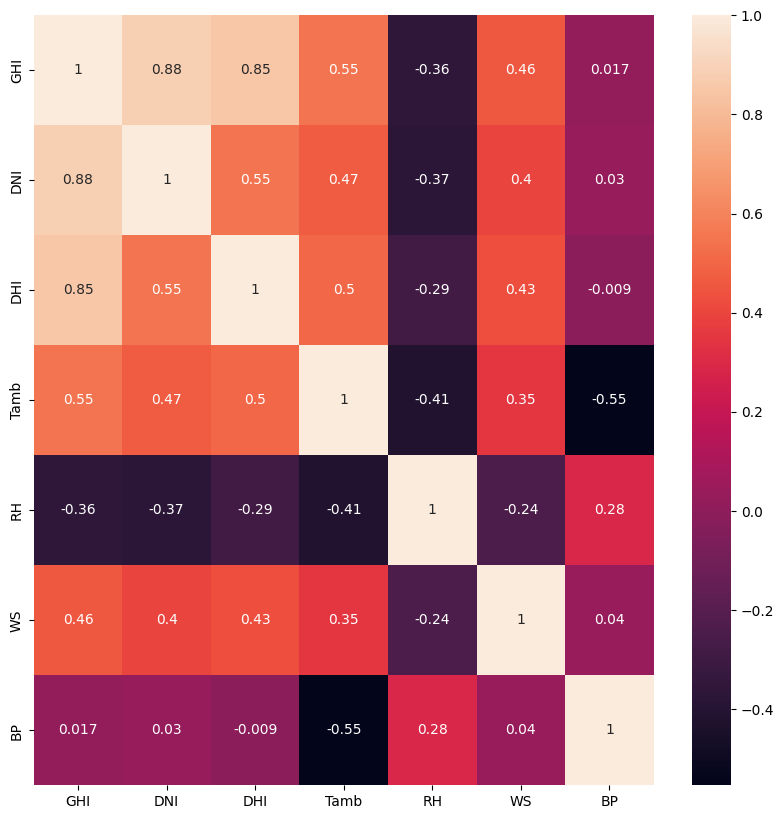

In [35]:
plt.figure(figsize=(10,10))
sb.heatmap(envSradiationCorelation,annot=True)
plt.show()

Investgating the relationship b/n solar radiation and the tempreature messurements

In [36]:
solar_tempCorrelation=df[["GHI", "DNI", "DHI","ModA", "ModB"]].corr()

In [32]:
solar_tempCorrelation

GHI       DNI       DHI      ModA      ModB
GHI   1.000000  0.882376  0.849989  0.994443  0.994869
DNI   0.882376  1.000000  0.546602  0.892023  0.892012
DHI   0.849989  0.546602  1.000000  0.829923  0.827886
ModA  0.994443  0.892023  0.829923  1.000000  0.998745
ModB  0.994869  0.892012  0.827886  0.998745  1.000000

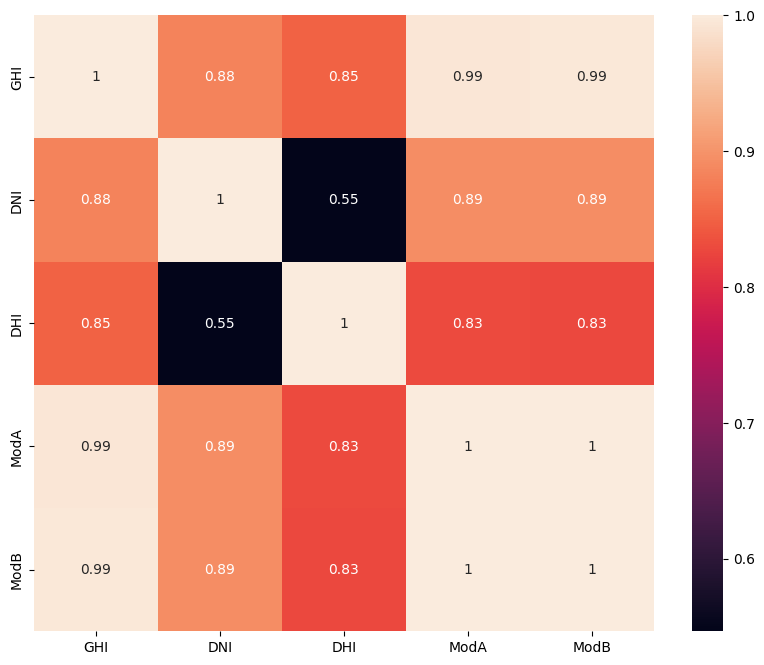

In [37]:
plt.figure(figsize=(10,8))
sb.heatmap(solar_tempCorrelation, annot=True)
plt.show()

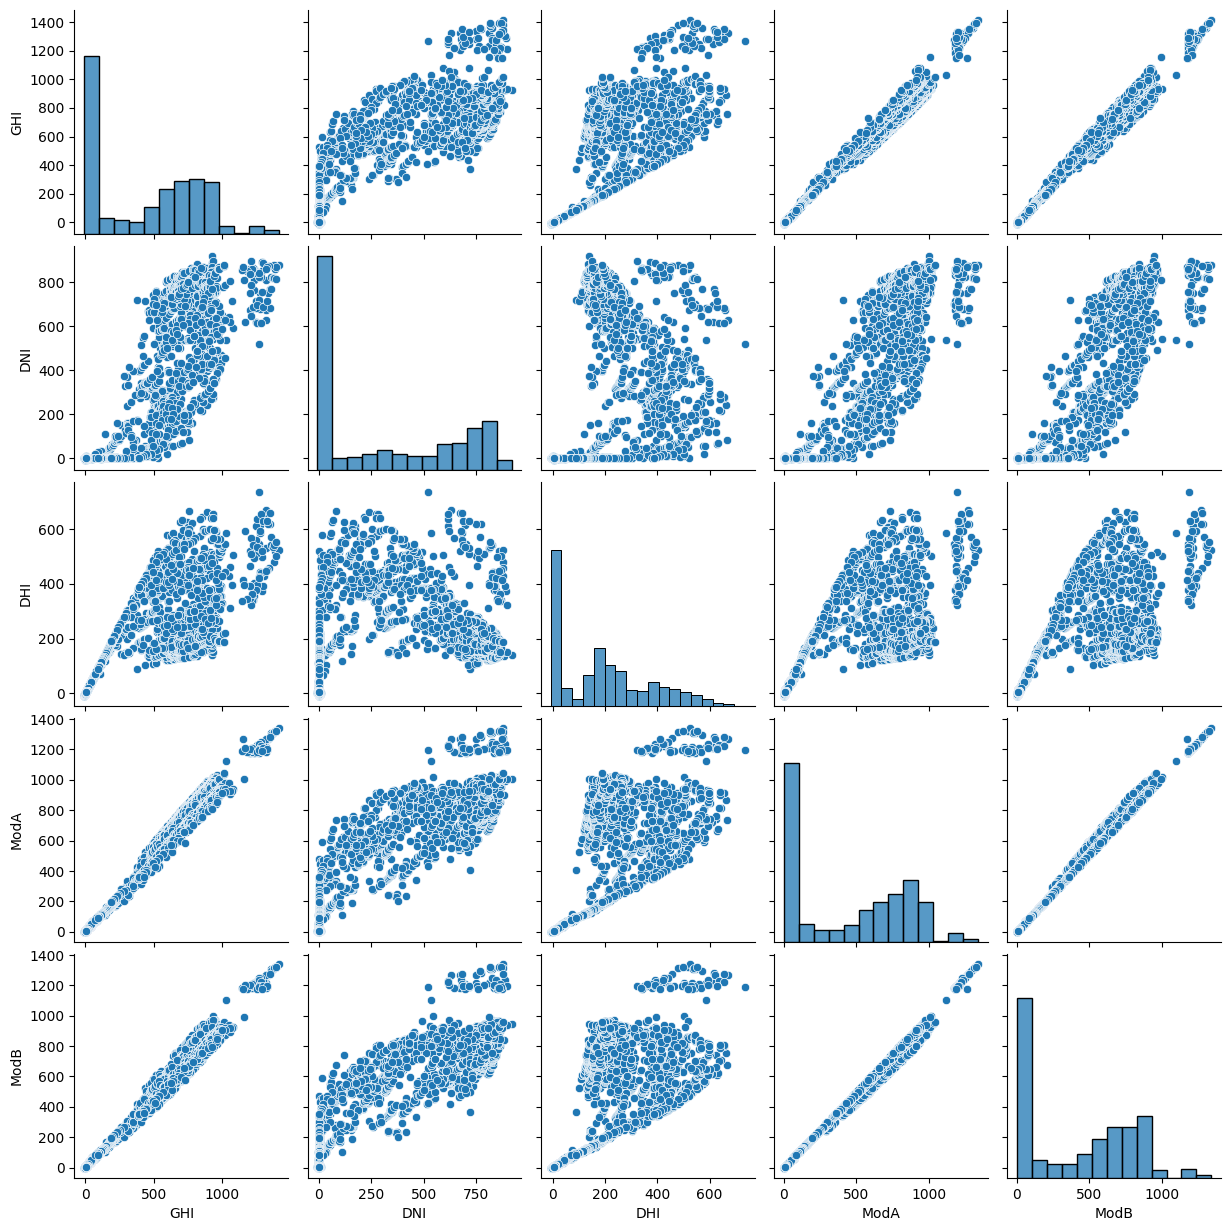

In [38]:
solar_temp=Nonenegativedatazscore[["GHI", "DNI", "DHI","ModA", "ModB"]]

sb.pairplot(solar_temp)

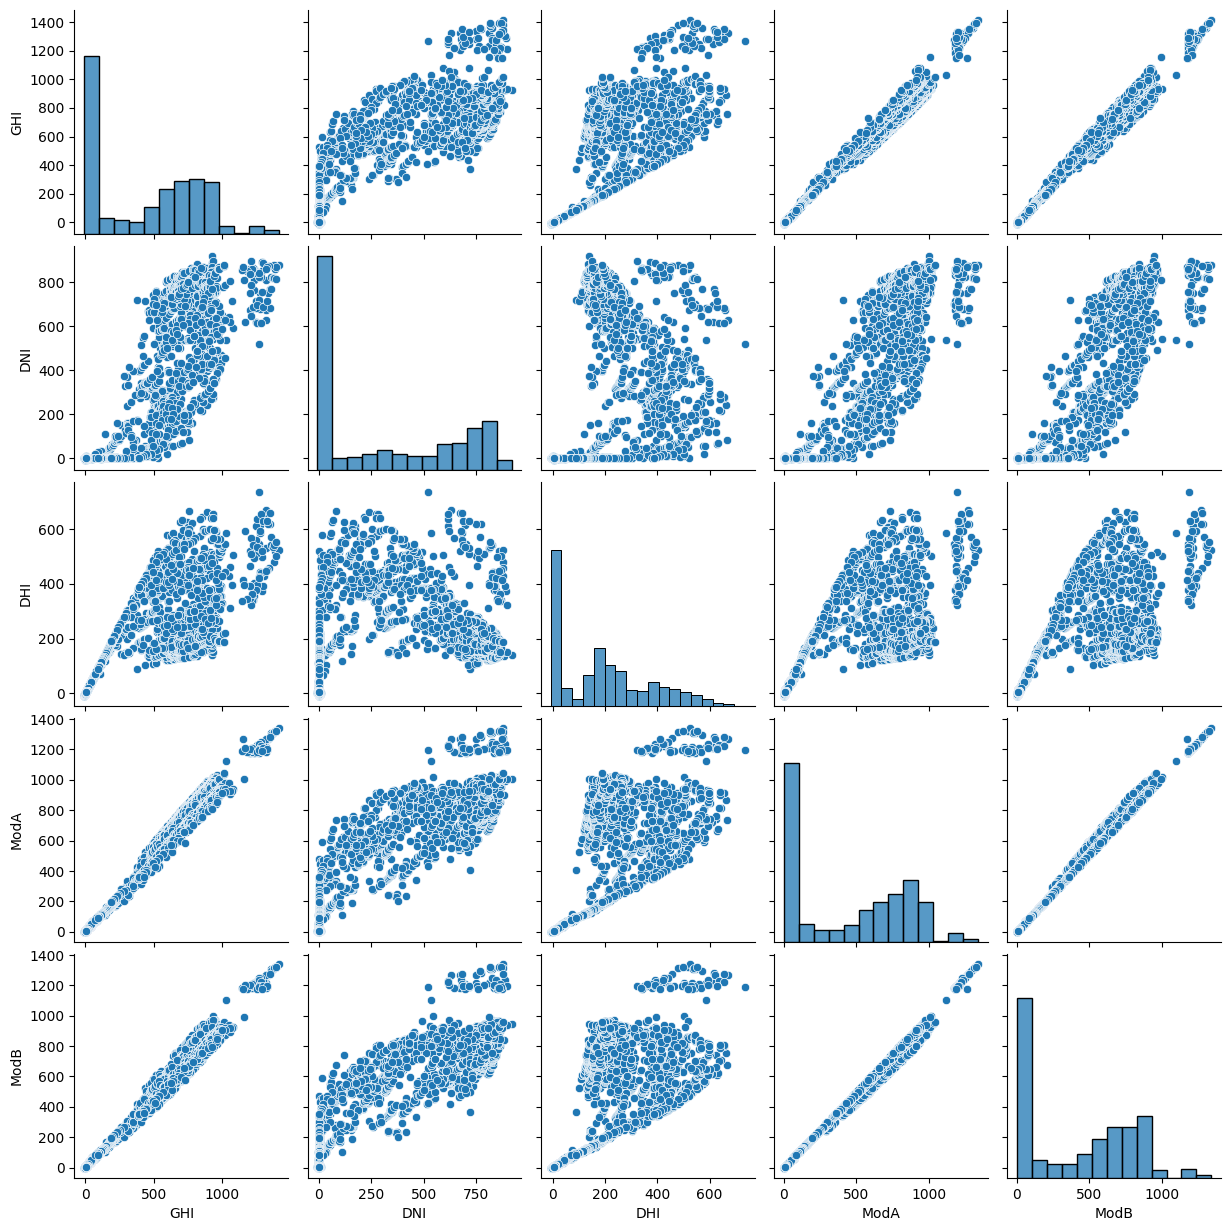

In [39]:
solar_temp=Nonenegativedatazscore[["GHI", "DNI", "DHI","ModA", "ModB"]]

sb.pairplot(solar_temp)

Time-based grouping

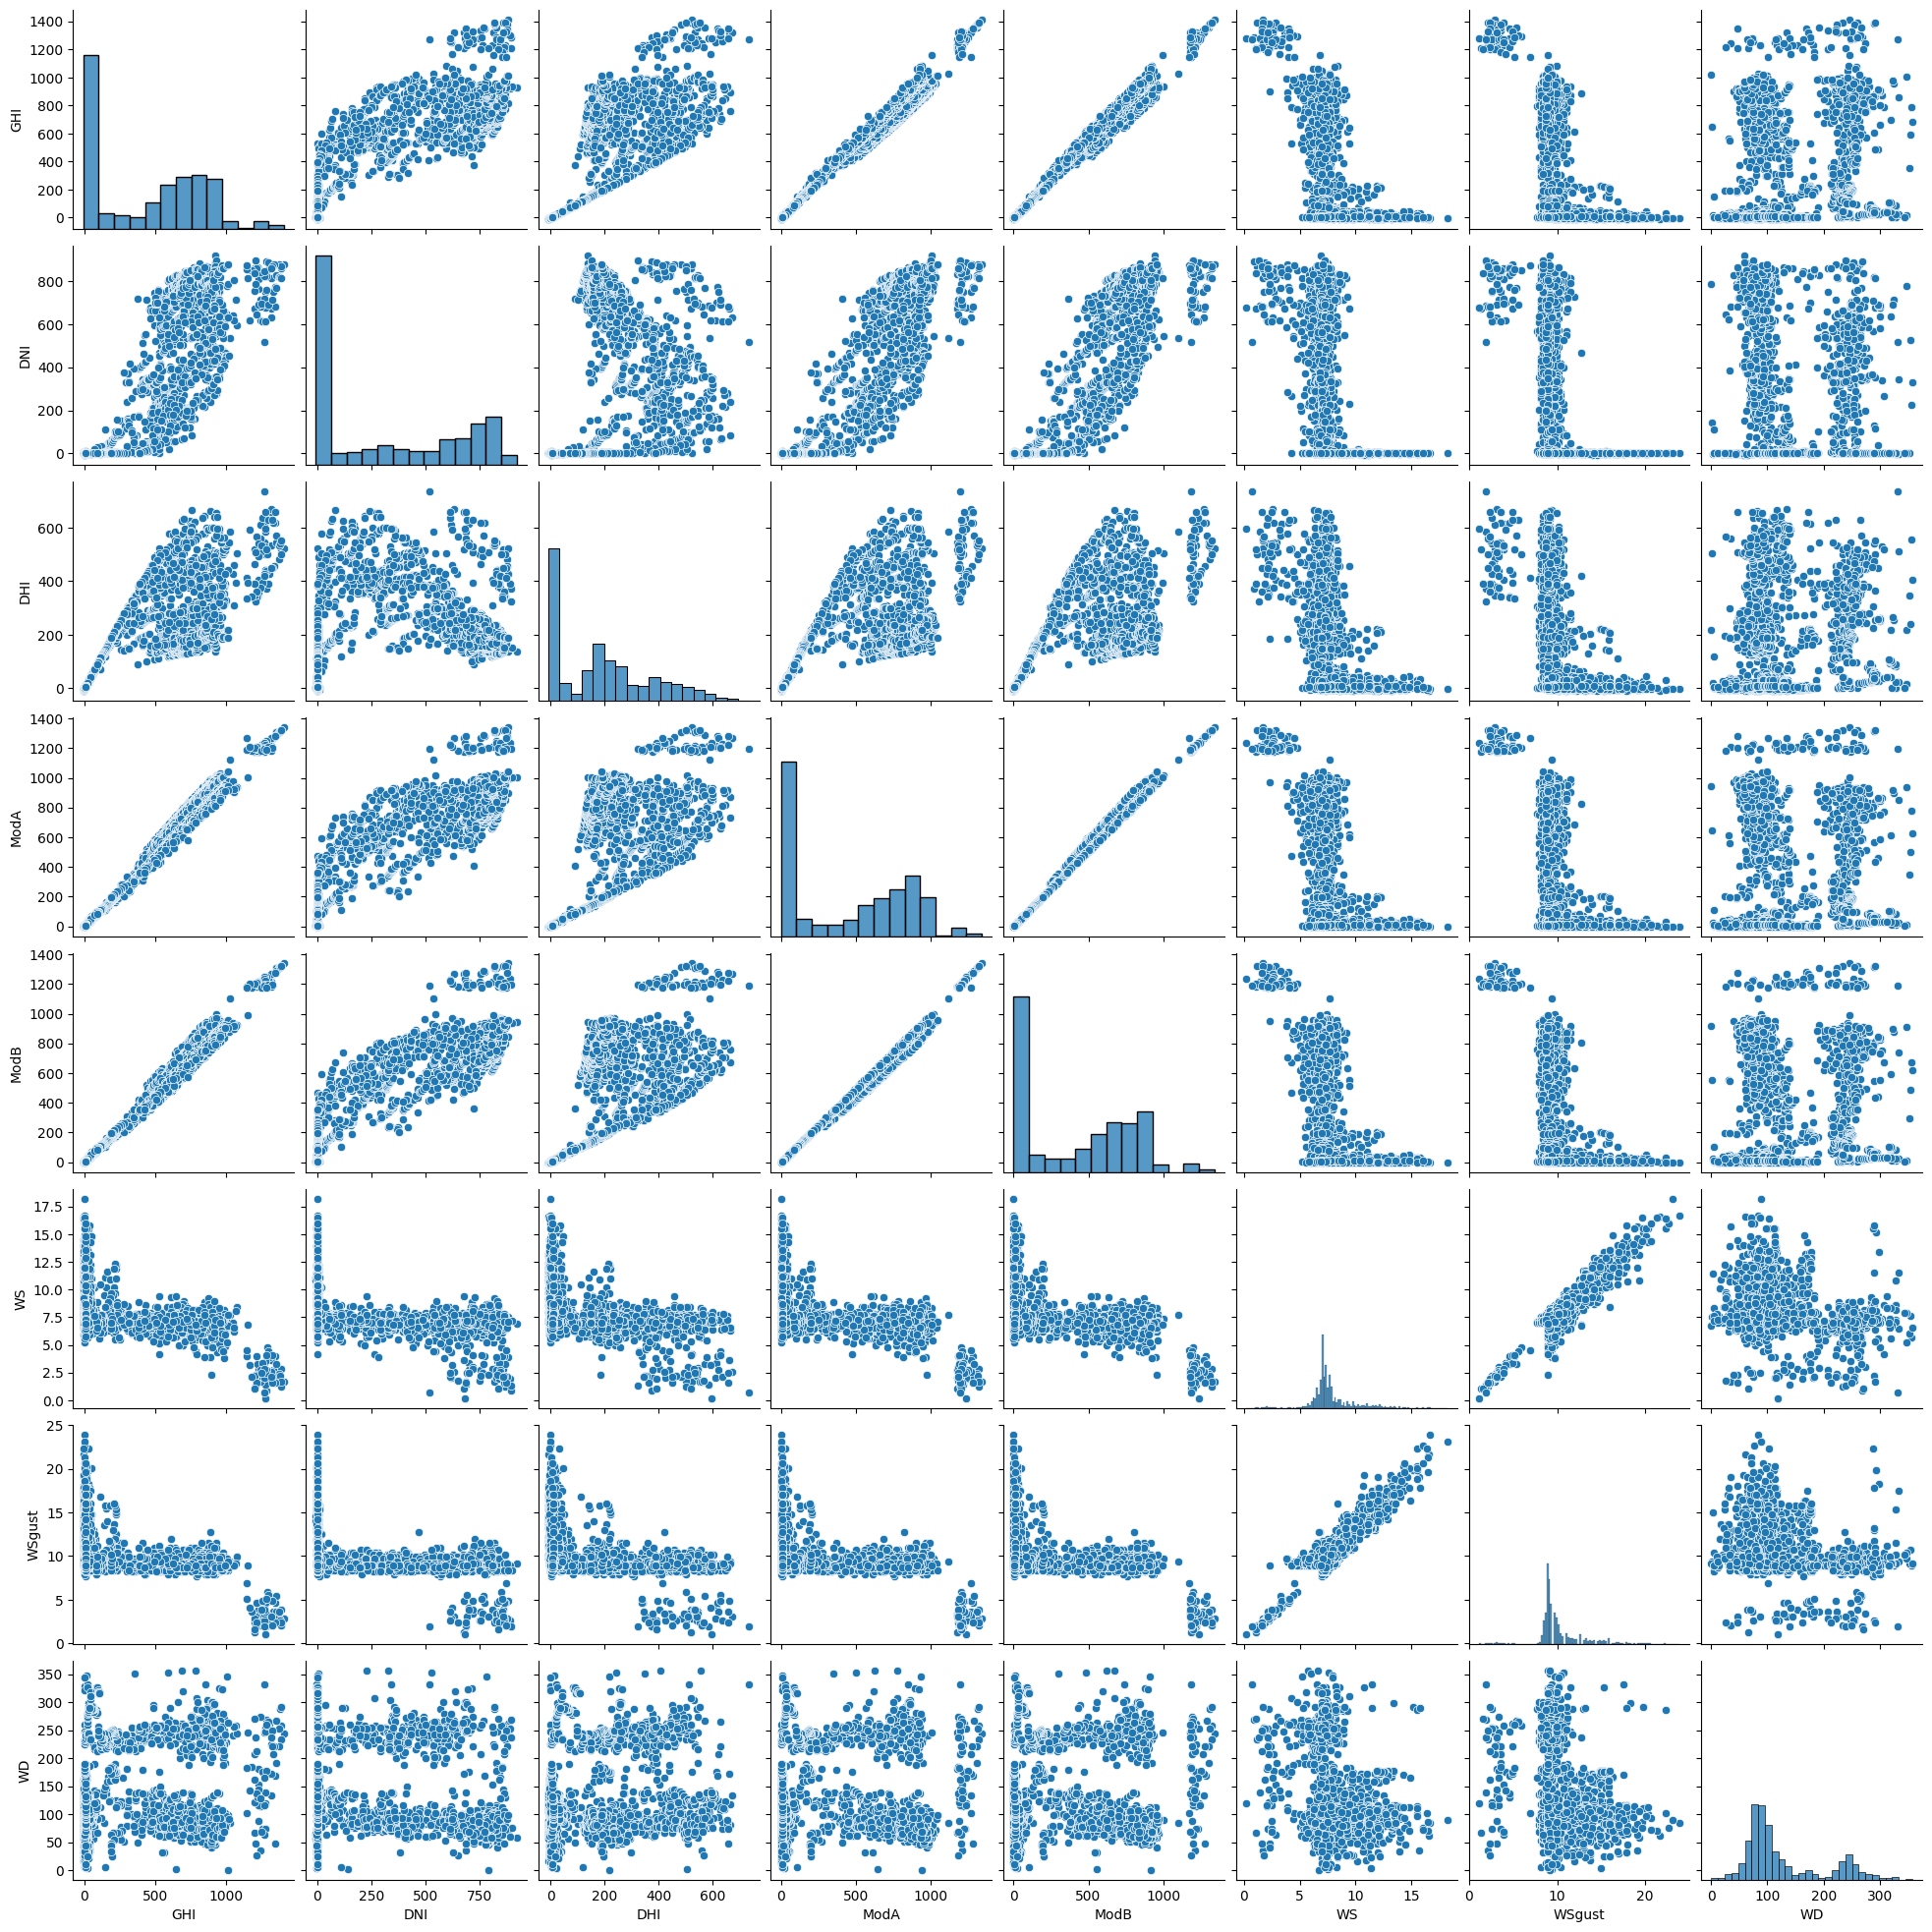

In [40]:
solar_temp=Nonenegativedatazscore[["GHI", "DNI", "DHI","ModA", "ModB","WS", "WSgust", "WD"]]

sb.pairplot(solar_temp)

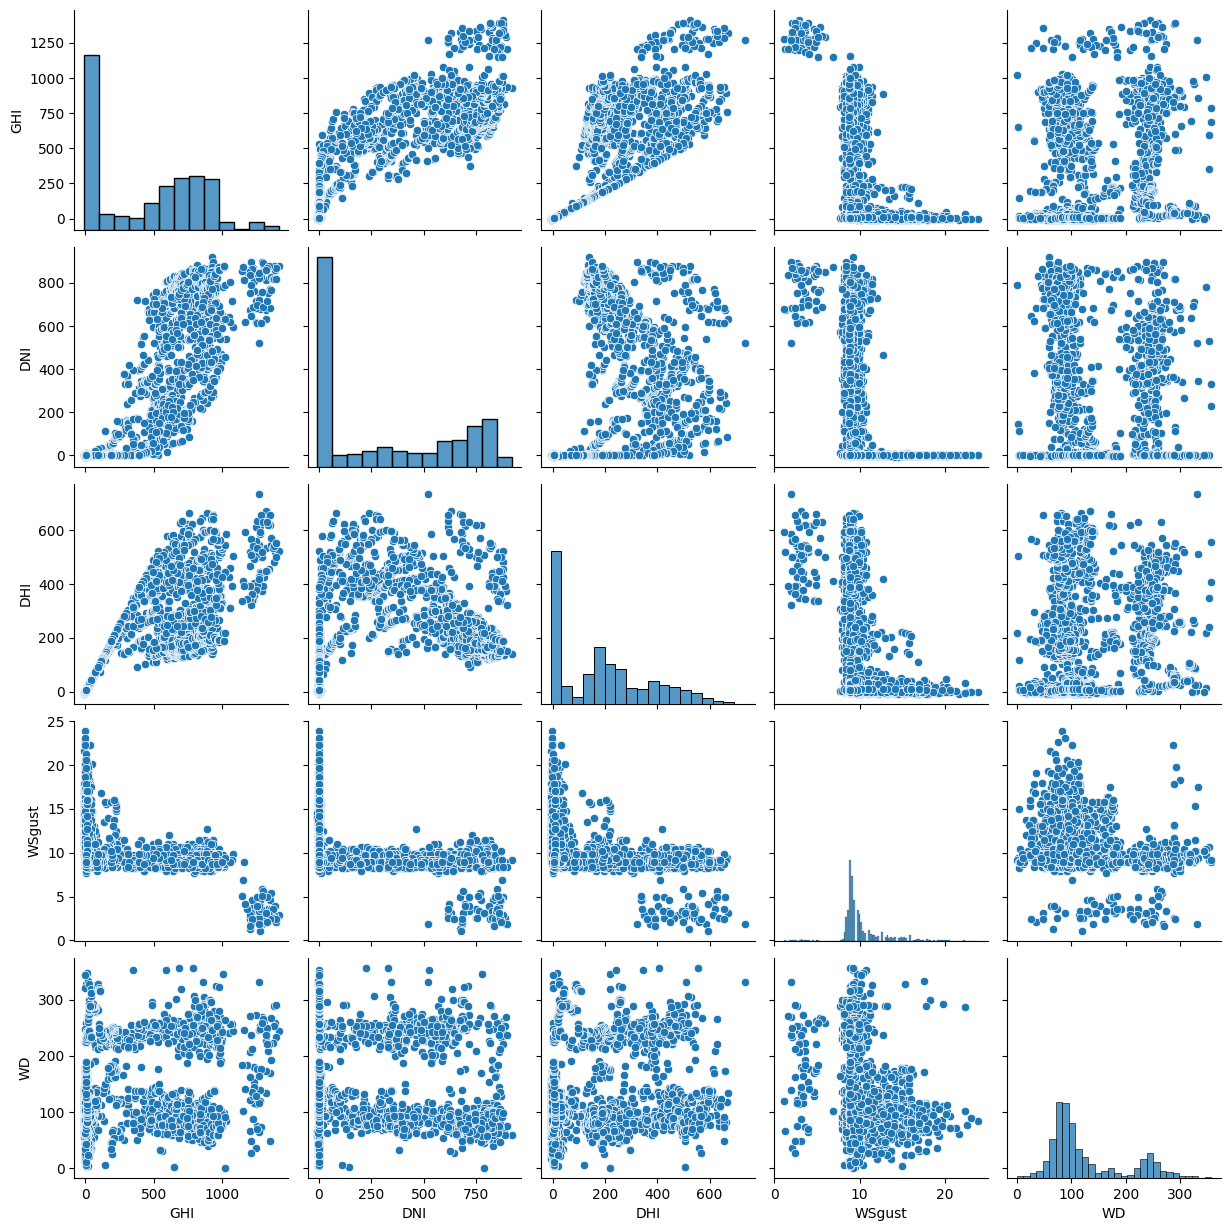

In [41]:
solar_temp=Nonenegativedatazscore[["GHI", "DNI", "DHI","WSgust", "WD"]]

sb.pairplot(solar_temp)

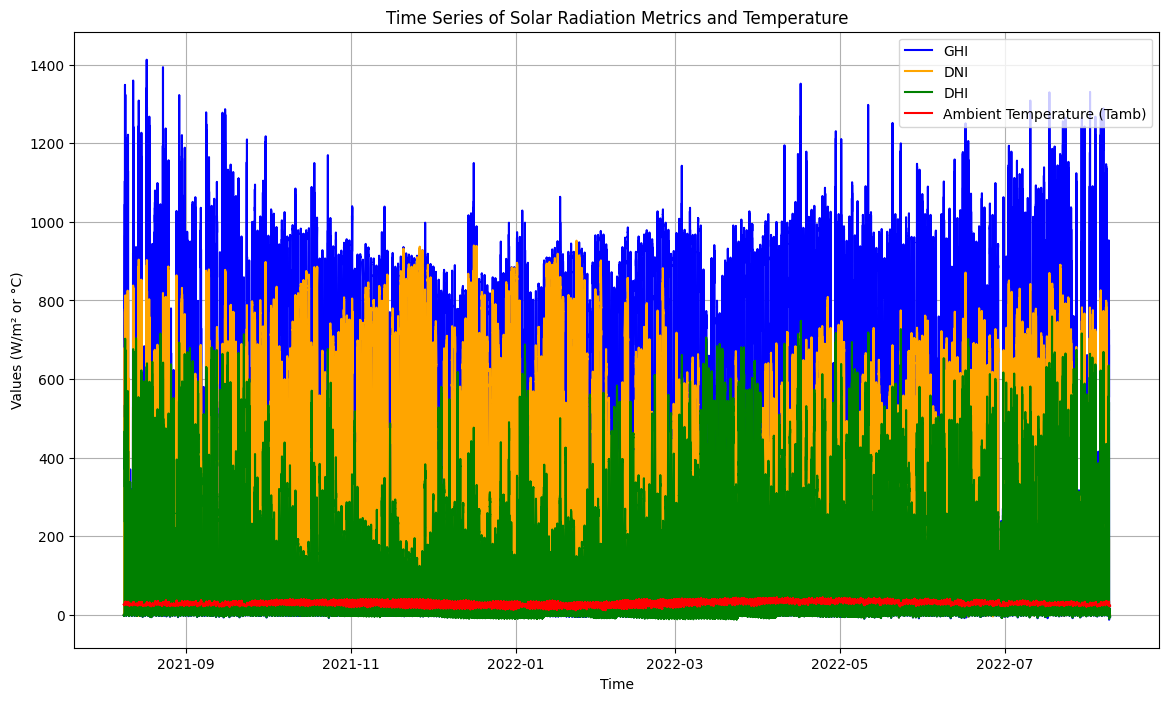

In [42]:
timeSerieAnalysis(df)

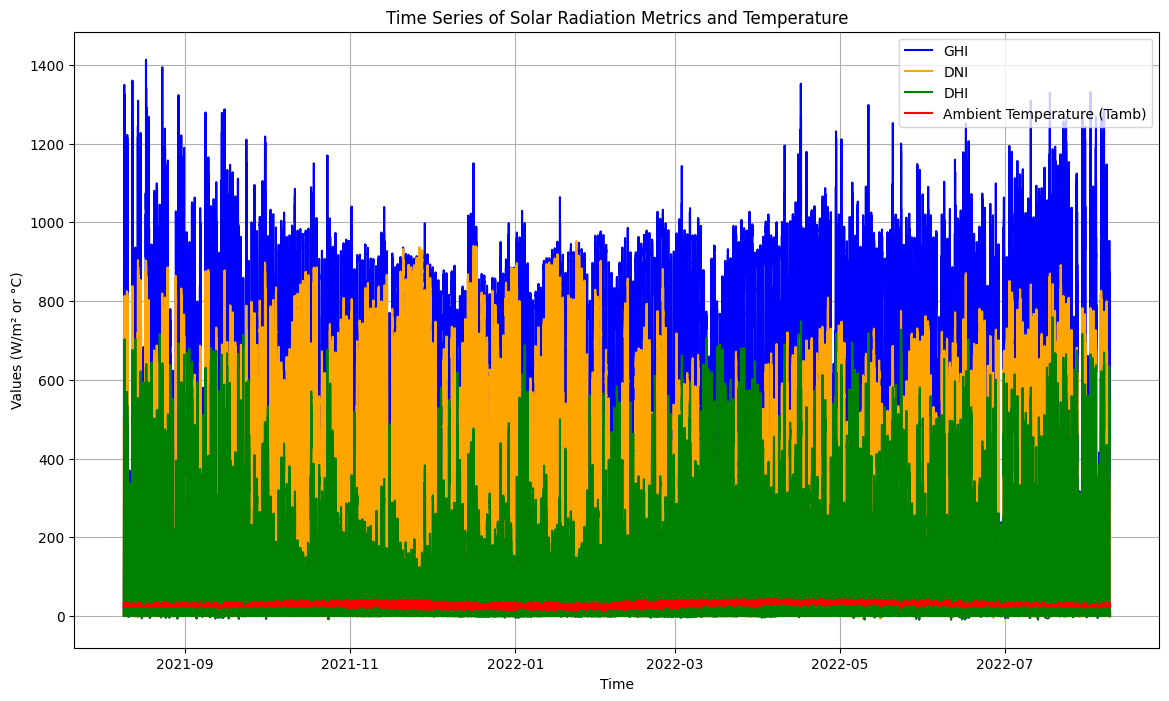

In [43]:
timeSerieAnalysis(handledData)

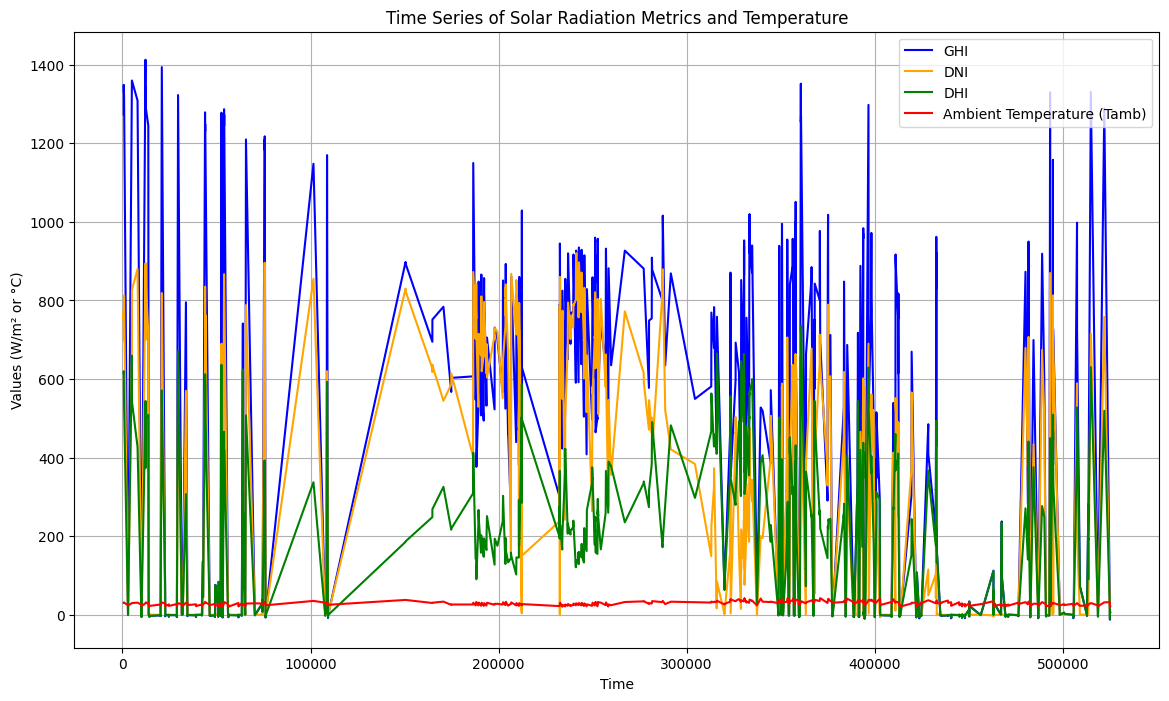

In [44]:
timeSerieAnalysis(zscoredData)

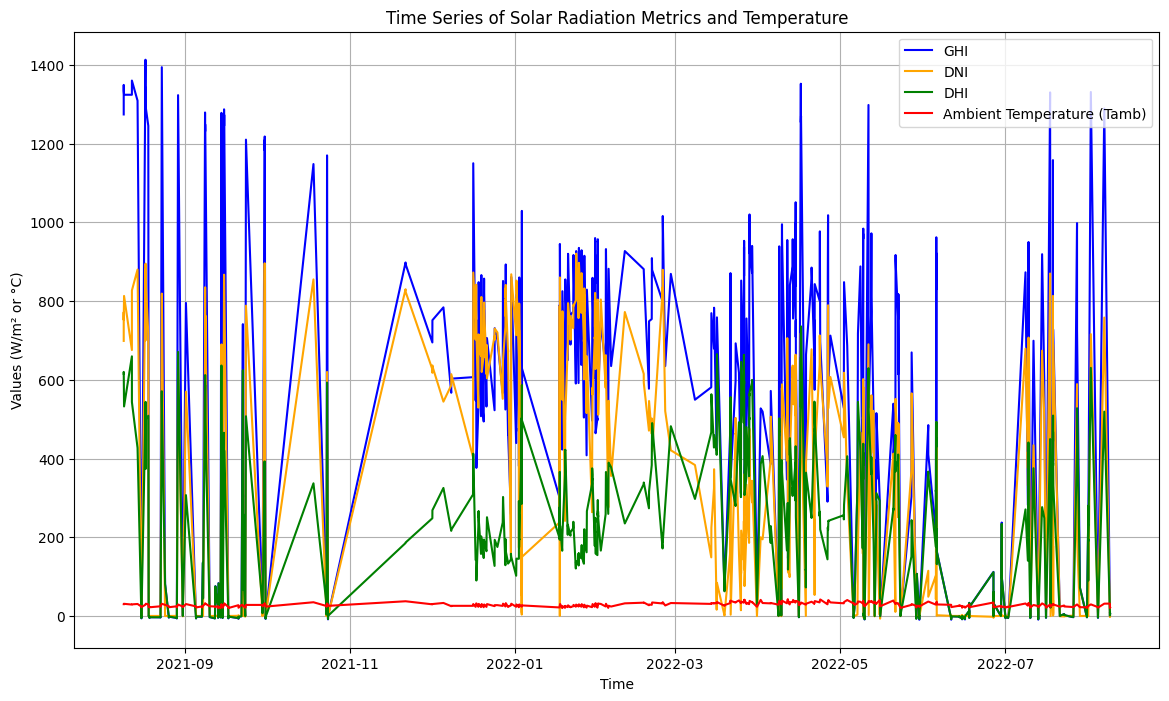

In [45]:
timeSerieAnalysis(Nonenegativedatazscore)

<Axes: title={'center': 'Daily Solar Radiation Trends'}, xlabel='Timestamp'>

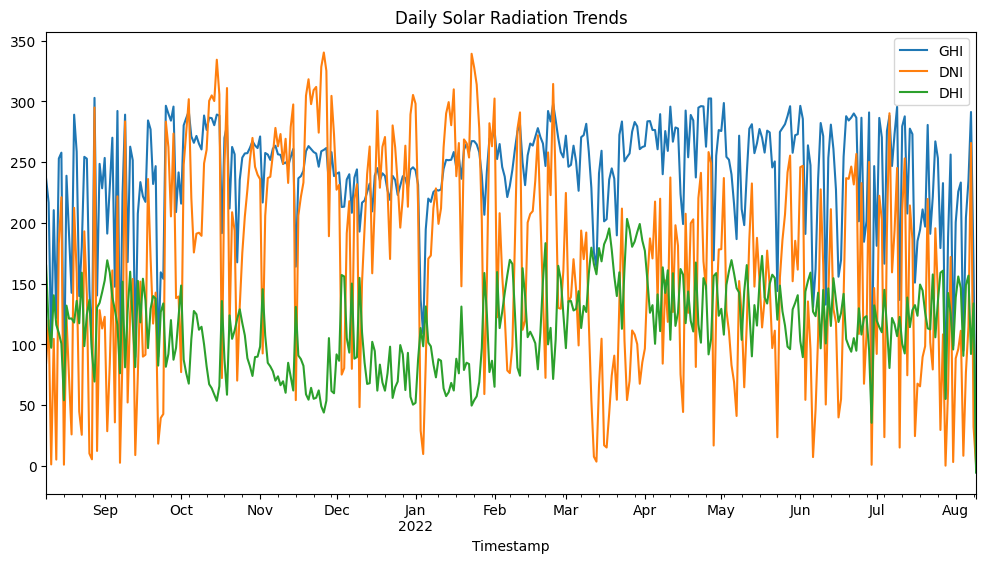

In [46]:
# Resample data to daily means
daily_data = df.resample('D').mean()

# Plot daily solar radiation trends
daily_data[['GHI', 'DNI', 'DHI']].plot(figsize=(12, 6), title="Daily Solar Radiation Trends")

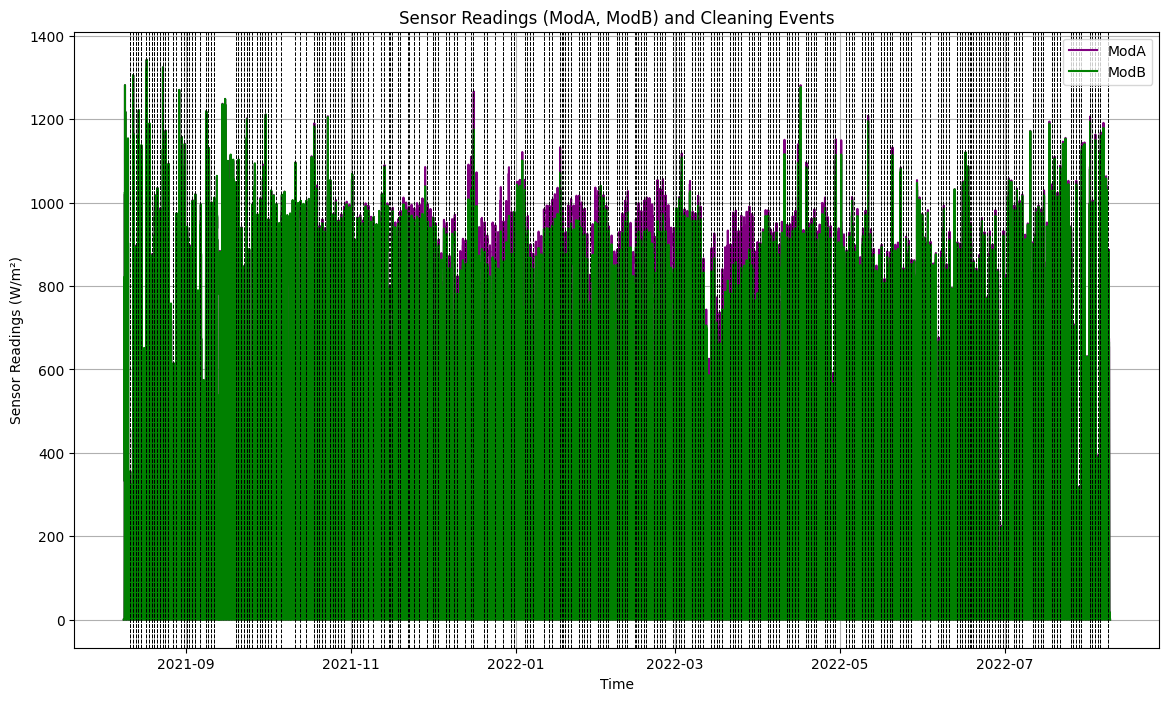

In [47]:
cleaningEffect(df)

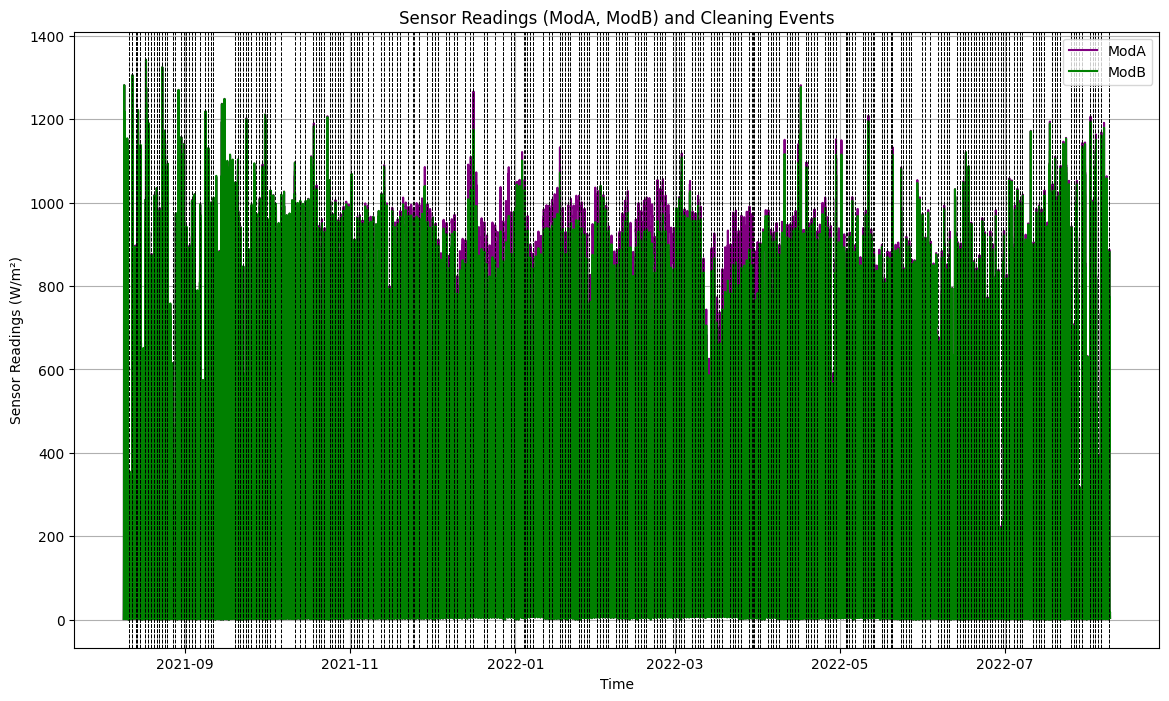

In [48]:
cleaningEffect(handledData)

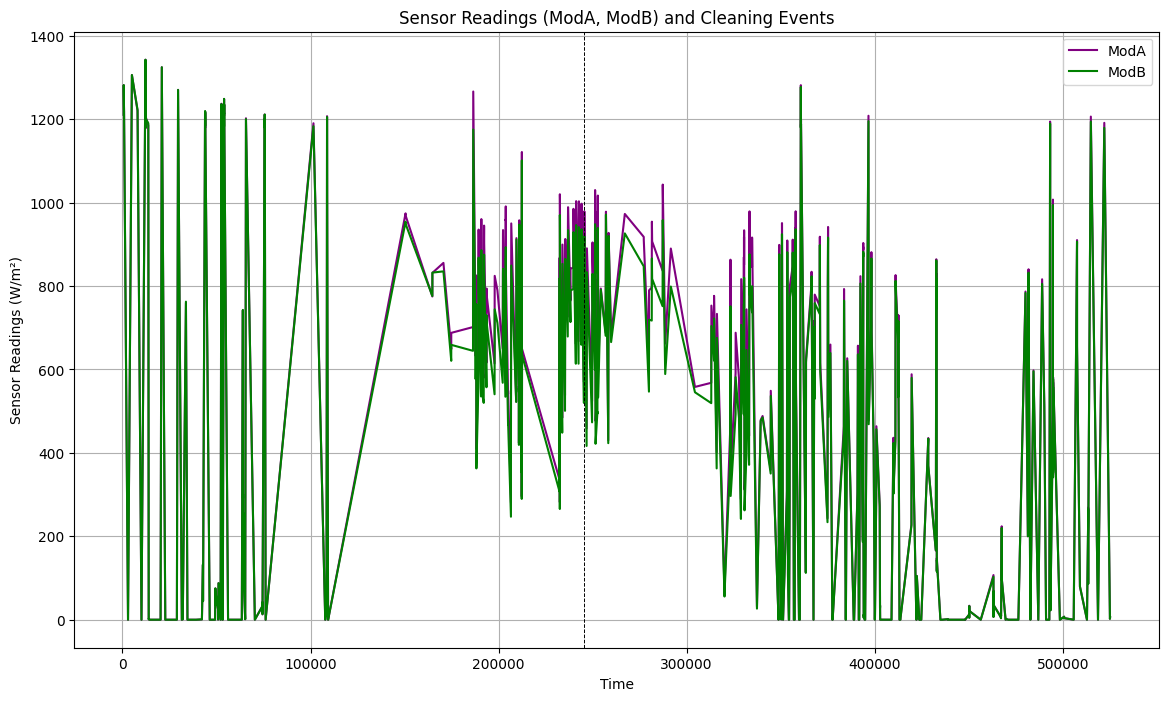

In [49]:
cleaningEffect(zscoredData)

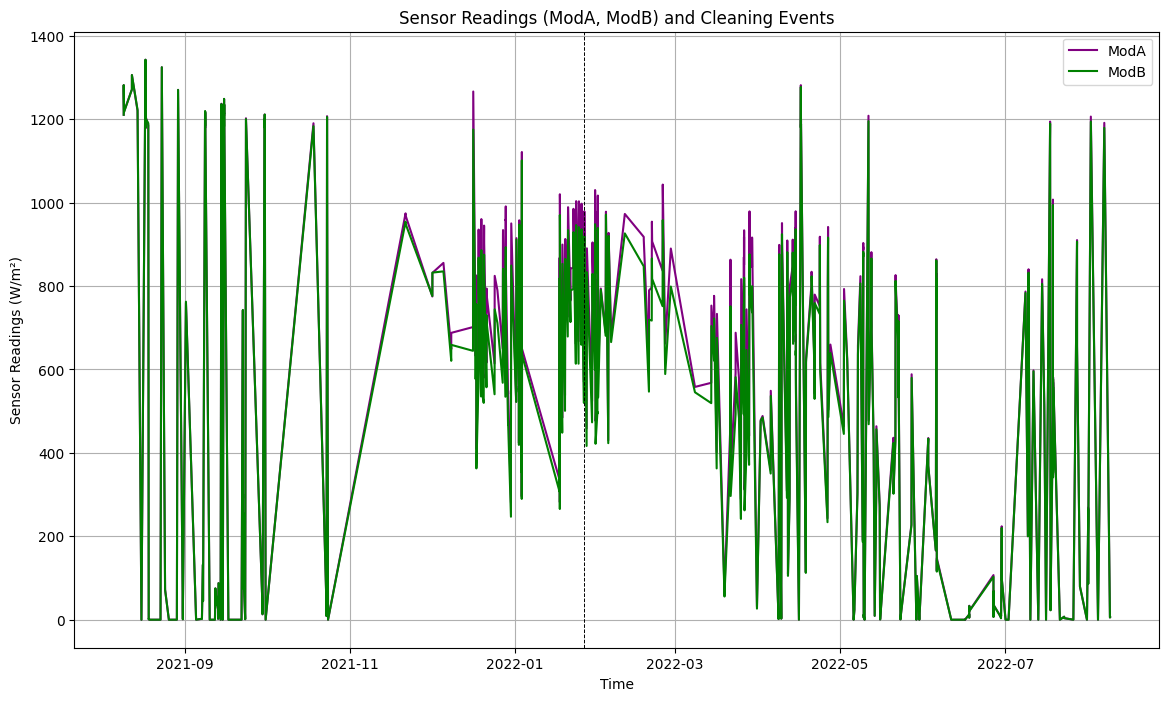

In [50]:
cleaningEffect(Nonenegativedatazscore)

In [51]:
# # Resample data to daily means
# daily_data = zscoredData.resample('D').mean()

# # Plot daily solar radiation trends
# daily_data[['GHI', 'DNI', 'DHI']].plot(figsize=(12, 6), title="Daily Solar Radiation Trends")